In [90]:
import geopandas as gp
import pandas as pd

# Argentinian provinces that make up 90% of its wheat production
relevant_areas = ['Buenos Aires', 'Córdoba', 'Entre Ríos', 'La Pampa', 'Santa Fe', 'Santiago del Estero']

In [91]:
# Read shapefile of the relevant Argentinian provinces
adm01_shape = gp.read_file("data/SHAPE/arg_admbnda_adm1_unhcr2017.shp")
adm01_shape = adm01_shape.loc[adm01_shape["ADM1_ES"].isin(relevant_areas), ["ADM1_ES", "geometry"]].reset_index(drop=True)
adm01_shape = adm01_shape.to_crs("EPSG:4326")

# Read all grid cell coordinates of the hindcasts
hindcast_coordinates = pd.read_csv("data/hindcast_coordinate_pairs.csv")
hindcast_coordinates = gp.GeoDataFrame(hindcast_coordinates, geometry=gp.points_from_xy(hindcast_coordinates["lon"], hindcast_coordinates["lat"], crs=4326))

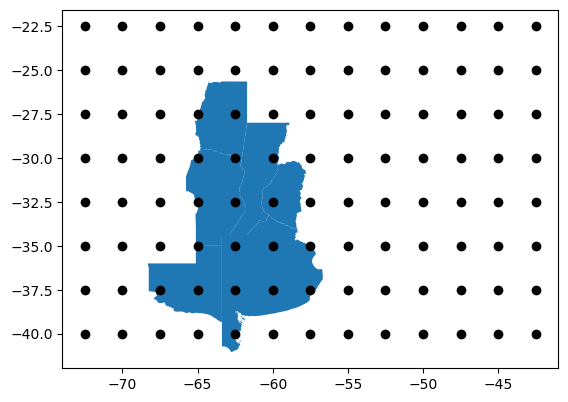

In [92]:
# Visualize grid cell locations and provinces
ax = adm01_shape["geometry"].plot()
hindcast_coordinates["geometry"].plot(ax=ax, color="black");

In [94]:
# Spatial join to filter grid cell locations that are within provinces
hindcast_coordinates = (gp
                        .sjoin(hindcast_coordinates, adm01_shape, how="left", predicate="within")
                        .dropna(subset=["ADM1_ES"])[["lat", "lon", "ADM1_ES"]]
                        .set_index(["lat", "lon"]))

In [96]:
hindcast_coordinates.to_csv("data/hindcast_coordinate_pairs_filtered.csv")